# 1 Project Background

#### 1.1 Problem
This challenge involves solving a binary image classification problem using convolutional neural networks (CNNs), where the task is to identify metastatic cancer in small image patches extracted from larger digital pathology slides.

The dataset is based on a cleaned version of the PatchCamelyon (PCam) dataset, a benchmark derived from the Camelyon16 challenge. Each image patch is labeled as:

    1 → contains metastatic tissue

    0 → benign (non-metastatic)

#### Project Data type, size, dimension, structure

- 1 csv file listing the image ID with its Binary label for testing (ground truth)
- 1 set of training images (count 220025)
- 1 set of test images (count 57458)

#### Images size & Dimension
- Input: RGB image patches (coloured images)
- Shape: 96 x 96 x 3
- Type: .tif
- Label: Binary (0 or 1)

Each images has the ID as its filename. The ID can be referenced back to the .csv file for the ground truth labelling for the training data. The test images also has the filename as Image ID while no labels are provided.

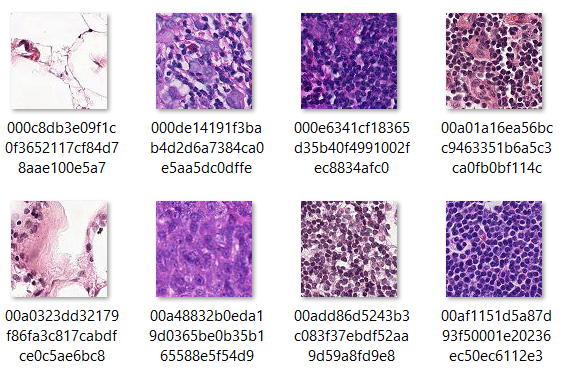

#### 1.2 Project Goal

The primary goal of this project is to develop a Convolutional Neural Network (CNN) model that can accurately classify whether a given microscopic image patch contains metastatic cancer tissue (label 1) or benign tissue (label 0). This is a binary classification task based on high-resolution histopathology image patches derived from whole-slide scans.

The model should be capable of learning discriminative features from the provided 96x96x3 RGB image inputs, generalizing to unseen data with strong performance in terms of classification metrics such as accuracy, AUC, or F1-score.


## 2 Data Cleaning
### <span style="color:rgba(109, 0, 0, 1)">2.1 Reasons</span>

- Check for Missing or Corrupted Images

A missing or unreadable image can cause your training loop to crash. Should try loading all images and see if the script can open all of them and discard those images that cannot be opened.

- Class Label Distribution

Histogram to check if the binary labels are distributed evenly on both labels to prevent biased model

- Check for images format

Check to see if all images in both training and test follow the standardised 96 x 96 x 3 RGB format

- Check for label consistency

The .csv files may contain labels other than 0 and 1

- Check for image duplication

Duplicated images, especially those that exist in both test and train set could cause data leakage affecting the final model.





----
### <span style="color:rgba(109, 0, 0, 1)">2.2 Data Cleaning and Checking </span>

Import necessary libraries

In [113]:
import numpy as np
import scipy as sp
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from collections import Counter


#### <span style="color:rgba(66, 59, 130, 0.8);">CSV data checking </span>

In [114]:
# Import csv data
df_train = pd.read_csv('data/train_labels.csv')
print(f'shape of training label csv dataframe: {df_train.shape}')
print(df_train.head(3))
# Check for missing values in csv
null_total = (df_train.isnull().sum().sum())
print (f'Missing data in any csv cell : {null_total}')

# Check for unique labels in csv
unique_labels = set(df_train['label'].tolist())
print (f'unique labels (csv)): {unique_labels}')

# Check for uniqueness and no duplication for id in csv
train_ids = df_train['id'].tolist()
count_train_ids = len(train_ids)
nr_unique_ids= len(set(train_ids))
print (f'nr. of total train id (csv): {count_train_ids}')
print (f'nr. of unique train id (csv): {nr_unique_ids}')


shape of training label csv dataframe: (220025, 2)
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
Missing data in any csv cell : 0
unique labels (csv)): {0, 1}
nr. of total train id (csv): 220025
nr. of unique train id (csv): 220025


#### <span style="color:rgba(66, 59, 130, 0.8);">Consistency Check between csv and image data</span>

In [115]:


# Check for test images data uniqueness and no duplication
test_folder_path = 'C:\\Users\\kenne\\Desktop\\cancer_images\\test'
test_img_names = os.listdir(test_folder_path)
count_test_files = len(test_img_names)
nr_unique_filenames = (len(set(test_img_names)))
print (f'nr. of total test filename: {count_test_files}')
print (f'nr. of unique test filename: {nr_unique_filenames}')

# Check for train images data uniqueness and no duplication
train_folder_path = 'C:\\Users\\kenne\\Desktop\\cancer_images\\train'
train_img_names = os.listdir(train_folder_path)
count_train_files = len(train_img_names)
nr_unique_filenames = (len(set(train_img_names)))
print (f'nr. of total train filename: {count_train_files}')
print (f'nr. of unique train filename: {nr_unique_filenames}')

#Cross check for csv ids and image file names
check_consistency = Counter(train_ids) == Counter(name.split('.')[0] for name in train_img_names)
print (f'Consistency between csv ids and image file names: {check_consistency}')


nr. of total test filename: 57458
nr. of unique test filename: 57458
nr. of total train filename: 220025
nr. of unique train filename: 220025
Consistency between csv ids and image file names: True


#### <span style="color:rgba(66, 59, 130, 0.8);">Images Format Check </span>

In [116]:
# fail_count = 0
# for filename in train_img_names:
#     file_path = os.path.join(train_folder_path, filename)
#     img = cv2.imread(file_path)
#     if img is None:
#         fail_count+=1
#         print(f"Corrupted image: {filename}")
#     elif img.shape != (96, 96, 3):
#         fail_count+=1
#         print(f"Invalid shape: {filename} → {img.shape}")
# print(f"Total corrupted or invalid images: {fail_count}")

#### <span style="color:rgba(66, 59, 130, 0.8);">Class Distribution check</span>

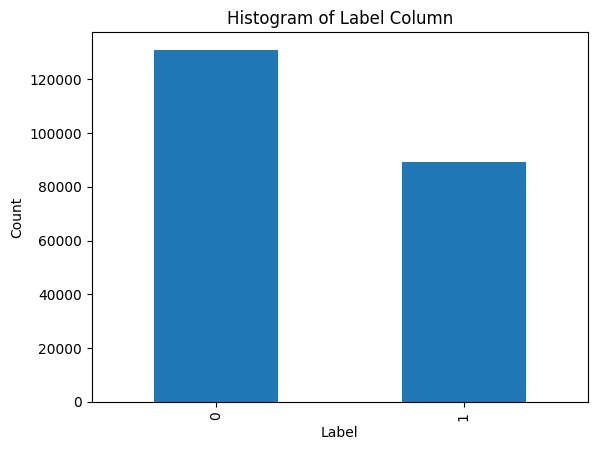

In [117]:
df_train['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Label Column')
plt.show()

### <span style="color:rgba(109, 0, 0, 1)">2.3 Analysis Plan</span>

#### Step 1 Data Splitting

Splitting the train data into training set and validation set

#### Step 2 Preprocessing

Preprocessing data like normalization and random shuffling samples

#### Step 3 Model Design

- Start with simpler CNN architecture and estimate time required for each iteration
- Consider switching to GPU for computing

#### Step 4 Model Evaluation

- Plot training vs validation loss and accuracy to check for overfitting if any
- Calculate precision, recall, F1 score
- Identify misclassified examples

#### Step 5 Model Hyperparameters Tuning

Tune hyperparameters (learning rate, dropout rate, number of layers) or deeper architecture

## 3 Model Architecture
### <span style="color:rgba(109, 0, 0, 1)">Baseline Model Setup</span>

Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem. Compare multiple architectures and tune hyperparameters. 

Prepare dataset format for pytorch training

In [118]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from torch_optimizer import RAdam

class ImageDataset(Dataset):
    def __init__(self, dataframe, image_dir):
        self.df = dataframe.reset_index(drop=True)
        self.image_dir = image_dir
        
        #Create "label:index" & "index:label" mapping
        self.id_to_index = {id: index for index, id in enumerate(self.df['id'].unique())}
        self.index_to_id = {index: id for id, index in self.id_to_index.items()}
        
        #Create a new column in dataframe for label index
        self.df['index'] = self.df['id'].map(self.id_to_index)
        
    # Let Dataloader to get length of dataframe
    def __len__(self):
        return self.df.shape[0]

    # Let Dataloader to get item by index call
    def __getitem__(self, index):
        # Load image and pair up index label
        img_id = self.df.loc[index, 'id']
        img_label = self.df.loc[index, 'label']
        
        # Read Image
        img_path = os.path.join(self.image_dir, img_id) + ".tif"
        image = cv2.imread(img_path)

        # print (image.shape)
        
        # Preprocess image: BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Ensure image size is 96x96
        image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_AREA)

        # Center the image data to -1 to 1 range
        image = image.astype('float32') / 255.0
        image = (image - 0.5) / 0.5
        
        # Match PyTorch input format: Channel x Height x Width
        image = torch.from_numpy(image).permute(2, 0, 1)
        
        return image, torch.tensor(img_label, dtype=torch.long)

df_train = df_train[:5000]

# Use GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create Dataset and split into train and validation sets
train_set_percent = 0.8
train_idx, val_idx = train_test_split(
    df_train.index,
    test_size=0.2,
    stratify=df_train['label'],
    random_state=42
)

train_dataset = ImageDataset(df_train.loc[train_idx].reset_index(drop=True), image_dir=train_folder_path)
val_dataset = ImageDataset(df_train.loc[val_idx].reset_index(drop=True), image_dir=train_folder_path)

# DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# For debugging __getitem__ if needed
for image, label in train_loader:
    break


Create the architecture for CNN model

In [ ]:
class CNN_model(nn.Module):
    
    #Set Up model architecture
    def __init__(self, num_classes,init_channel=3,input_size = 96, dropout = 0.5):
        
        #Initialize nn.Module
        super(CNN_model, self).__init__()
        
        # Architecture parameters control , convolutional layers with higher stride is used instead of pooling
        nr_filters = [128,128,256,256,512,512]
        filter_sizes = [3,3,3,3,3,3]
        padding_values = [1,1,1,1,1,1]
        stride_values = [1,2,1,2,1,2]
        feature_size = 512
        
        # Layer dynamic configuration 
        layers_config = []
        for i in range(len(nr_filters)):
            config = {
                'in_channels': init_channel if i == 0 else nr_filters[i - 1],
                'out_channels': nr_filters[i],
                'kernel_size': filter_sizes[i],
                'padding': padding_values[i],
                'stride': stride_values[i]
            }
            layers_config.append(config)
        
        # Create convolutional layers dynamically
        self.conv_layers = nn.ModuleList()
        current_size = input_size
        
        for i,cfg in enumerate(layers_config):
            block = nn.Sequential(
                nn.Conv2d(cfg['in_channels'], cfg['out_channels'],
                        kernel_size=cfg['kernel_size'],
                        padding=cfg['padding'],
                        stride=cfg['stride']),
                nn.BatchNorm2d(cfg['out_channels']),
                nn.ReLU(inplace=True),
            )
            self.conv_layers.append(block)
            
            current_size = ((current_size + 2 * cfg['padding'] - cfg['kernel_size']) // cfg['stride']) + 1
            
        final_feature_dim = nr_filters[-1] * current_size * current_size
        
        # Fully connected layers
        self.classifier = nn.Sequential(
            nn.Linear(final_feature_dim, feature_size),
            nn.BatchNorm1d(feature_size),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(feature_size, feature_size //2),
            nn.BatchNorm1d(feature_size //2),
            nn.ReLU(),
            nn.Dropout(dropout),
            
            nn.Linear(feature_size//2, num_classes)
        )
                
    #Execute forward pass based on architecture
    def forward(self, x):
        for block in self.conv_layers:
            x = block(x)
            
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def train_and_evaluate_model(nr_epoches = 20):
    
    # Training and Validation Loop
    train_losses = []
    val_losses = []
    train_acc_score = []
    val_acc_score = []
    for epoch in range(nr_epoches):
        
        
        # Training Loop
        model.train()
        total_train_loss  = 0
        train_preds = []
        train_targets = []
        
        for images, labels in train_loader:
            
            # Move data to device
            images = images.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            # Forward pass  
            optimizer.zero_grad()
            outputs = model(images)
            
            # Compute loss
            loss = criterion(outputs, labels)
            loss.backward()

            # Update weights
            optimizer.step()
            total_train_loss  += loss.item()
            
            # Get predictions
            preds = torch.argmax(outputs, dim=1)
            train_preds.append(preds.cpu())
            train_targets.append(labels.cpu())
        
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Compute accuracy and F1 for training set
        train_preds = torch.cat(train_preds).numpy()
        train_targets = torch.cat(train_targets).numpy()
        train_f1 = f1_score(train_targets, train_preds)
        train_acc = accuracy_score(train_targets, train_preds)
        train_acc_score.append(train_acc)
        
        # Validation Loop
        model.eval()
        total_val_loss = 0
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for images, labels in val_loader:
                
                # Move data to device
                images = images.to(device, non_blocking=True)
                labels = labels.to(device, non_blocking=True)

                # Compute validation loss
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                
                # Get predictions
                preds = torch.argmax(outputs, dim=1)
                all_preds.append(preds.cpu())
                all_targets.append(labels.cpu())
        
        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        # Compute accuracy and F1 for validation set
        all_preds = torch.cat(all_preds).numpy()
        all_targets = torch.cat(all_targets).numpy()
        val_f1 = f1_score(all_targets, all_preds)
        val_acc = accuracy_score(all_targets, all_preds)
        val_acc_score.append(val_acc)
        
        print(f'Epoch [{epoch+1}/{nr_epoches}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
        print(f'Epoch [{epoch+1}/{nr_epoches}], Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}')
        print(f'Epoch [{epoch+1}/{nr_epoches}], Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')
        print ('-'*50)
        
        # learning rate decay
        scheduler.step()

    return train_losses, val_losses, train_acc_score, val_acc_score

def init_weights_xavier(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

image_pixel_size = 96
nr_class = len(df_train['label'].unique())

# Hyperparameters
nr_epoches = 20
dropout = 0.5
weight_decay = 0.001
learning_rate = 0.00001
scheduler_T_Max = 10

# Initialize model
model = CNN_model(num_classes=nr_class, init_channel=3, input_size=image_pixel_size, dropout=dropout).to(device)

# Xavier initialization
model.apply(init_weights_xavier)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) #Use this optimizer
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=scheduler_T_Max)

train_losses, val_losses, train_acc_score, val_acc_score = train_and_evaluate_model(nr_epoches = nr_epoches)

plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_acc_score, label='Train Accuracy Score', marker='o')
plt.plot(val_acc_score, label='Validation Accuracy Score', marker='s')
plt.title("Training and Validation Accuracy Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid(True)
plt.show()
